```Siddhant Gupta```

In [5]:
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

```Importing Data```

In [24]:
train_data = pd.read_csv("/Users/siddhantgupta/Desktop/ML/train-2.csv") #reading the csv files using pandas
test_data = pd.read_csv("/Users/siddhantgupta/Desktop/ML/test-2.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
test_data.shape

(28000, 784)

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## Looking for NULL values .

In [8]:
sum(train_data.isnull().sum())

0

In [9]:
sum(test_data.isnull().sum())

0

In [10]:
## Looking at some of the training images of the digits .

Text(0.5, 1.0, 'Digit 0')

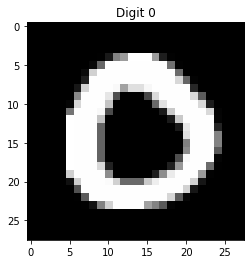

In [11]:

zero = train_data.iloc[4, 1:]
zero.shape
zero = zero.values.reshape(28,28)
plt.imshow(zero, cmap='gray')
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 1')

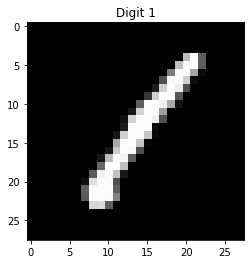

In [12]:
one = train_data.iloc[0, 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 1')

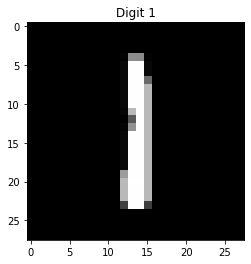

In [13]:
one = train_data.iloc[2, 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")

In [14]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/Users/siddhantgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

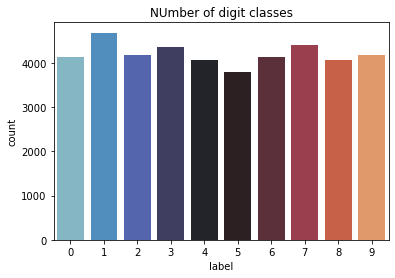

In [15]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

``` Data is very well distributed for every digit . ```

In [16]:
(train_data).describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


``` In this data set I dont think we would need scaling as the mean values are between 0 - 0.5.```

In [25]:
#### Separating the X and Y variable

y_train = train_data['label']

#### Dropping the variable 'label' from X variable 
X_train = train_data.drop(columns = 'label')

#### Printing the size of data 
print(X_train.shape)

(42000, 784)


In [28]:
from sklearn.preprocessing import scale
X_scaled = scale(X_train)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size = 0.3, train_size = 0.2 ,random_state = 13)

In [ ]:
X_train.shape

In [20]:
X_test.shape

(12600, 784)

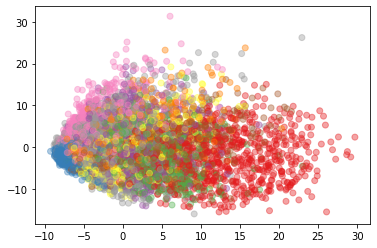

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(X_train)
plt.scatter(view[:,0], view[:,1], c=y_train.astype('int'), alpha=0.4, cmap='Set1')

[6.05041451 4.19380154 3.91415633 3.05780342 2.69302711 2.34527788
 2.07909936 1.84812428 1.65670659 1.5537605  1.43655143 1.3647516
 1.31327006 1.22367294 1.15165073 1.12964726 1.11193121 1.0505218
 1.02641888 0.97020981 0.93673614 0.92374712 0.92136971 0.89575384
 0.84655846 0.82785838 0.8046892  0.78697171 0.74699705 0.73651224
 0.72842278 0.72122653 0.70167169 0.68397365 0.67195319 0.66150603
 0.6355162  0.62669059 0.6013399  0.59573318 0.58122039 0.56675892
 0.54434515 0.54141785 0.53582743 0.51927379 0.51353489 0.50645832
 0.49691697 0.48667495 0.46794858 0.45572317 0.4502631  0.44419265
 0.43808288 0.43364669 0.42764643 0.41798996 0.4127566  0.40665856
 0.39868325 0.38709575 0.38282232 0.37422766 0.36924118 0.363141
 0.35655832 0.35461263 0.35086877 0.34442664 0.34361615 0.33502915
 0.32765602 0.3265951  0.31690125 0.31577512 0.31116722 0.30359662
 0.29825702 0.2959949  0.29127654 0.28872647 0.28402188 0.27906288
 0.27827537 0.27289343 0.26810891 0.2650376  0.2598792  0.25502031

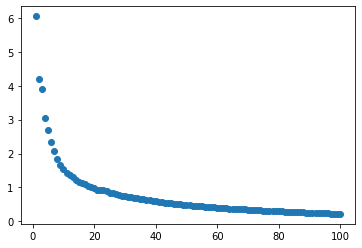

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
view = pca.fit_transform(X_train)

print((pca.explained_variance_ratio_)*100)
price = [ele for ele in range(1,101)]
plt.scatter(price, (pca.explained_variance_ratio_)*100)
plt.show()

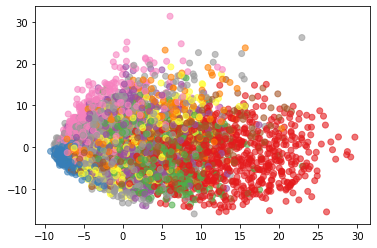

In [10]:
pca = decomposition.PCA(n_components=19)
view = pca.fit_transform(X_train)
plt.scatter(view[:,0], view[:,1], c=y_train.astype('int'), alpha=0.6, cmap='Set1')

In [11]:
pca = decomposition.PCA(n_components=19)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [26]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9296031746031747 

[[1190    0    5    2    1    7    7    1    8    0]
 [   0 1376    8   10    1    4    6    2    1    2]
 [   9    3 1140   10    5    1    3    9   18    4]
 [   5    6   27 1158    2   23    1   13   39   13]
 [   3    8   10    0 1156    3    8    4    6   52]
 [  15    1   10   28    5 1079   18    3   15   15]
 [   4    7    3    1    5    8 1221    1    3    0]
 [   0   12   13    3   12    0    0 1194    3   70]
 [   8   15    9   38    7   37    3    2 1103   16]
 [   7    5    5   20   38    7    1   55    9 1096]]


In [27]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [28]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8865079365079365 

[[1142    1    8   11    3   36   12    0    6    2]
 [   0 1367    6   14    0    7    3    4    8    1]
 [  11   10 1097   23    9    2   16    8   19    7]
 [   8    7   48 1099    3   60    2   17   31   12]
 [   3   14   11    1 1128    7   12    8    2   64]
 [  34    4   25   49   19  980   21    6   30   21]
 [  11    9   12    0   12   24 1176    2    7    0]
 [   2   12   15   18   12    1    0 1157    9   81]
 [  10   32   29   60    9   52    8    4 1012   22]
 [  11    7    4   29   70    6    1   94    9 1012]]


In [29]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(X_train)

/Users/siddhantgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/siddhantgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE-2')

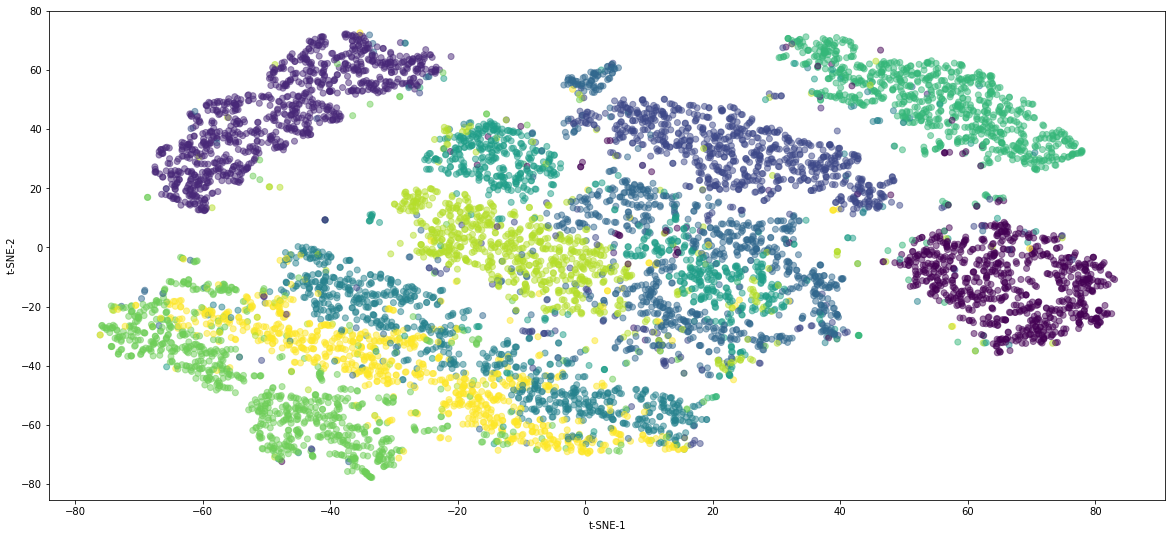

In [30]:
plt.figure(figsize=(20,9))
plt.scatter(view[:,0], view[:,1], c=y_train, alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

In [7]:
%%capture
%pip install bokeh

In [18]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [31]:
labels = y_train.astype('int')
images = X_train.reshape(X_train.shape[0], 28, 28)

In [15]:
df['label'].unique()

array([nan, '4', '7', '3', '1', '6', '5', '9', '8', '0', '2'],
      dtype=object)

In [16]:
 df.dropna(inplace = True) 

In [17]:
y_train.unique()

array([7, 9, 3, 1, 0, 8, 4, 6, 5, 2])

In [16]:
from bokeh.models import HoverTool
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('label','@label'),
               ('index', '$index')]
)


In [20]:
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=df['label'].unique(),
    palette=palette
)

In [21]:
# scatter plot in figure
fig_scat.scatter(
    x='x', y='y', alpha=0.6, 
    color={'field': 'label', 'transform': cmap}, 
    source=source
)

# display below
show(fig_scat)

In [12]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [13]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8854761904761905 

[[1150    1    5   11    3   33   10    0    6    2]
 [   0 1370    6   12    0    7    3    4    7    1]
 [   8   12 1097   22   11    2   15    8   19    8]
 [   9    9   46 1097    2   62    3   19   30   10]
 [   2   12   16    1 1124    6   10   10    2   67]
 [  36    4   25   51   20  969   20    6   31   27]
 [  12    9   11    1   13   28 1171    2    6    0]
 [   2   14   18   17   12    0    0 1154    9   81]
 [  11   31   31   58   11   51    7    3 1011   24]
 [  10    9    5   27   66    6    0   93   13 1014]]


In [ ]:
## Checking the accuracy with other type of models . 

In [14]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [15]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9301587301587302 

[[1190    0    4    2    1    7    8    1    8    0]
 [   0 1376    8   10    1    4    6    2    1    2]
 [   9    3 1141   10    5    1    3    9   18    3]
 [   5    6   26 1159    2   25    1   13   37   13]
 [   3    7   10    0 1161    3    8    4    6   48]
 [  15    1   11   29    5 1076   19    3   15   15]
 [   4    7    3    1    5    8 1221    1    3    0]
 [   0   12   13    4   11    0    0 1194    4   69]
 [   8   14    9   38    7   37    3    2 1104   16]
 [   7    5    6   21   34    7    1   54   10 1098]]


In [ ]:
################################################################################################